In [3]:
import numpy as np
import matplotlib.pyplot as plt


from pandas import read_csv
filename = 'Heart.csv'
data_heart = read_csv(filename)


In [14]:
data_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
n_miss=data_heart.isnull().sum()        
for col in range(data_heart.shape[1]):       
    print('Column {} has {} missing values.'.format(col, n_miss.iloc[col]))

Column 0 has 0 missing values.
Column 1 has 0 missing values.
Column 2 has 0 missing values.
Column 3 has 0 missing values.
Column 4 has 0 missing values.
Column 5 has 0 missing values.
Column 6 has 0 missing values.
Column 7 has 0 missing values.
Column 8 has 0 missing values.
Column 9 has 0 missing values.
Column 10 has 0 missing values.
Column 11 has 0 missing values.
Column 12 has 0 missing values.
Column 13 has 0 missing values.


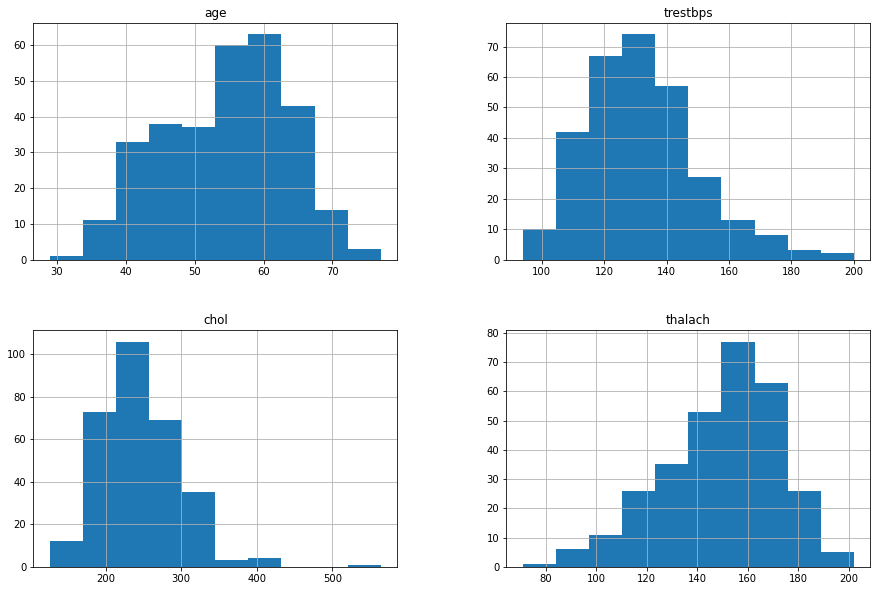

In [48]:
df1 = data_heart[['age','trestbps','chol', 'thalach']]
df1.hist(figsize=(15, 10))
plt.show()

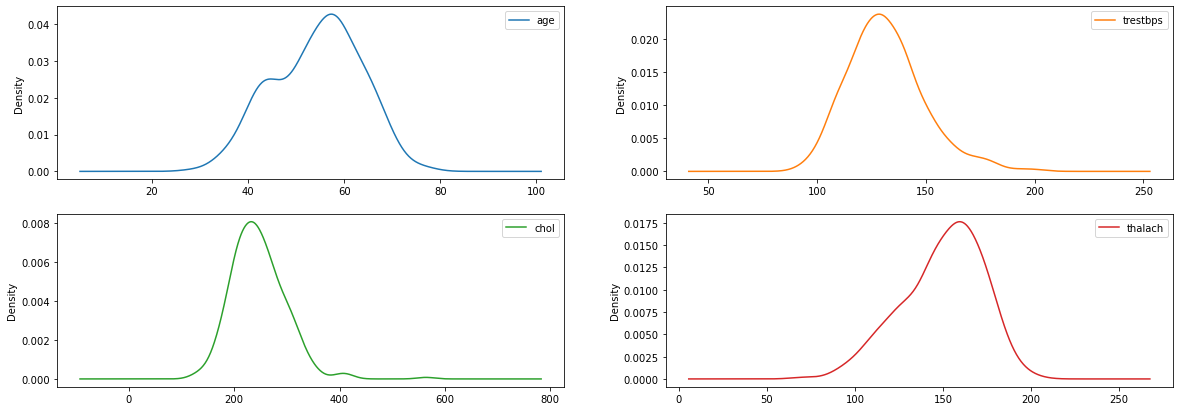

In [50]:
df1.plot(kind='density', subplots=True, layout=(2,2), sharex=False, figsize=(20,7))
plt.show()

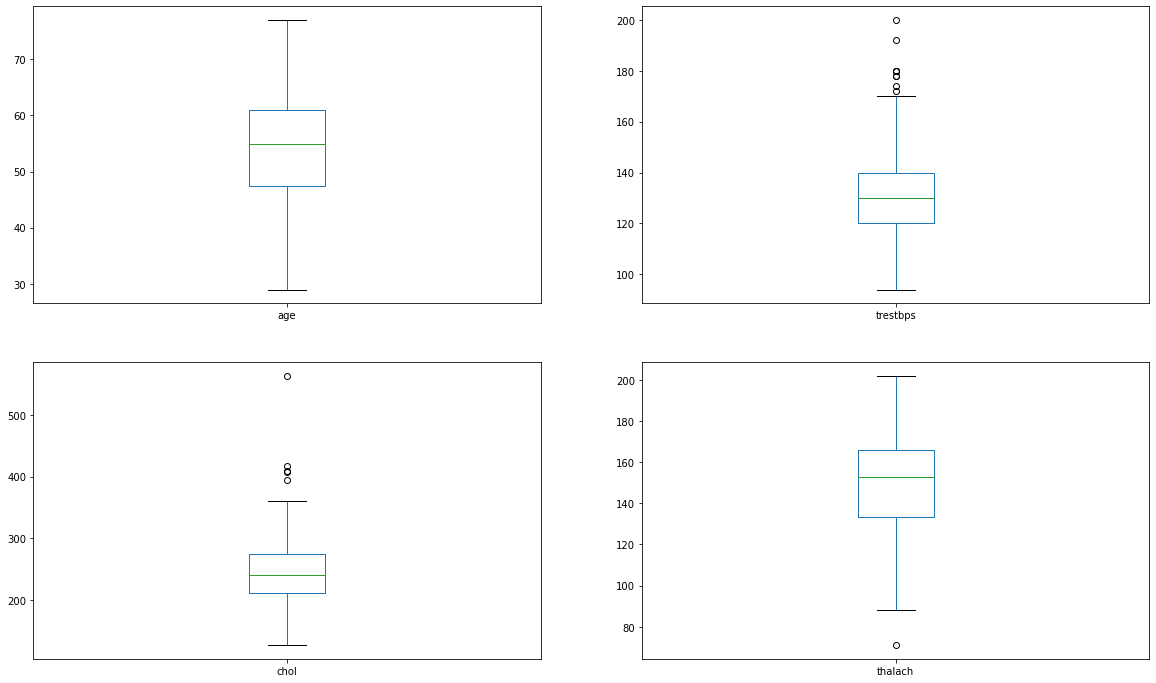

In [52]:
df1.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(20,12))
plt.show()